[titanic](https://www.kaggle.com/competitions/titanic)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_data = pd.read_csv('train.csv', index_col='PassengerId')
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train_data[['Pclass','Sex','Age','SibSp','Parch', 'Cabin','Embarked']].describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
count,891.000000,891,714.000000,891.000000,891.000000,204,889
unique,NaN,2,NaN,NaN,NaN,147,3
top,NaN,male,NaN,NaN,NaN,G6,S
freq,NaN,577,NaN,NaN,NaN,4,644
mean,2.308642,NaN,29.699118,0.523008,0.381594,NaN,NaN
std,0.836071,NaN,14.526497,1.102743,0.806057,NaN,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,NaN,NaN
25%,2.000000,NaN,20.125000,0.000000,0.000000,NaN,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,NaN,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,NaN,NaN


In [5]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
feature_names = ['Age', 'Pclass','Sex','SibSp','Parch', 'Embarked']


In [7]:
X_train = train_data[feature_names]
y_train = train_data['Survived']
X_train

,Age,Pclass,Sex,SibSp,Parch,Embarked
PassengerId,,,,,,
1,22.0,3,male,1,0,S
2,38.0,1,female,1,0,C
3,26.0,3,female,0,0,S
4,35.0,1,female,1,0,S
5,35.0,3,male,0,0,S
...,...,...,...,...,...,...
887,27.0,2,male,0,0,S
888,19.0,1,female,0,0,S
889,NaN,3,female,1,2,S


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

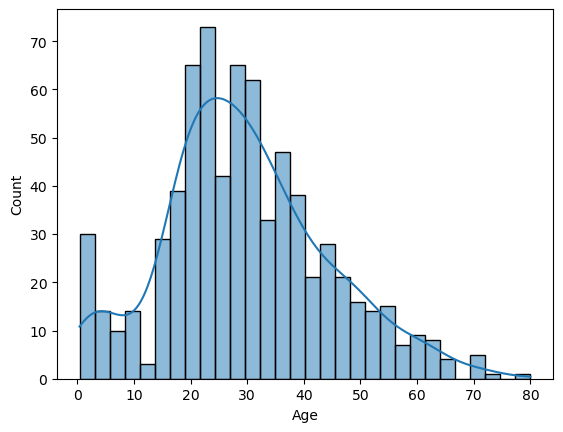

In [8]:
sns.histplot(X_train['Age'], bins=30, kde=True)
X_train['Age'].describe()

In [9]:
X_train.loc[:, 'Age']= X_train['Age'].fillna(X_train['Age'].median()).astype(int)

In [10]:
X_train.loc[:, 'Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])

loc避免在切片上面操作

In [11]:
X_train.isnull().sum()

Age         0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## 1. pairplot

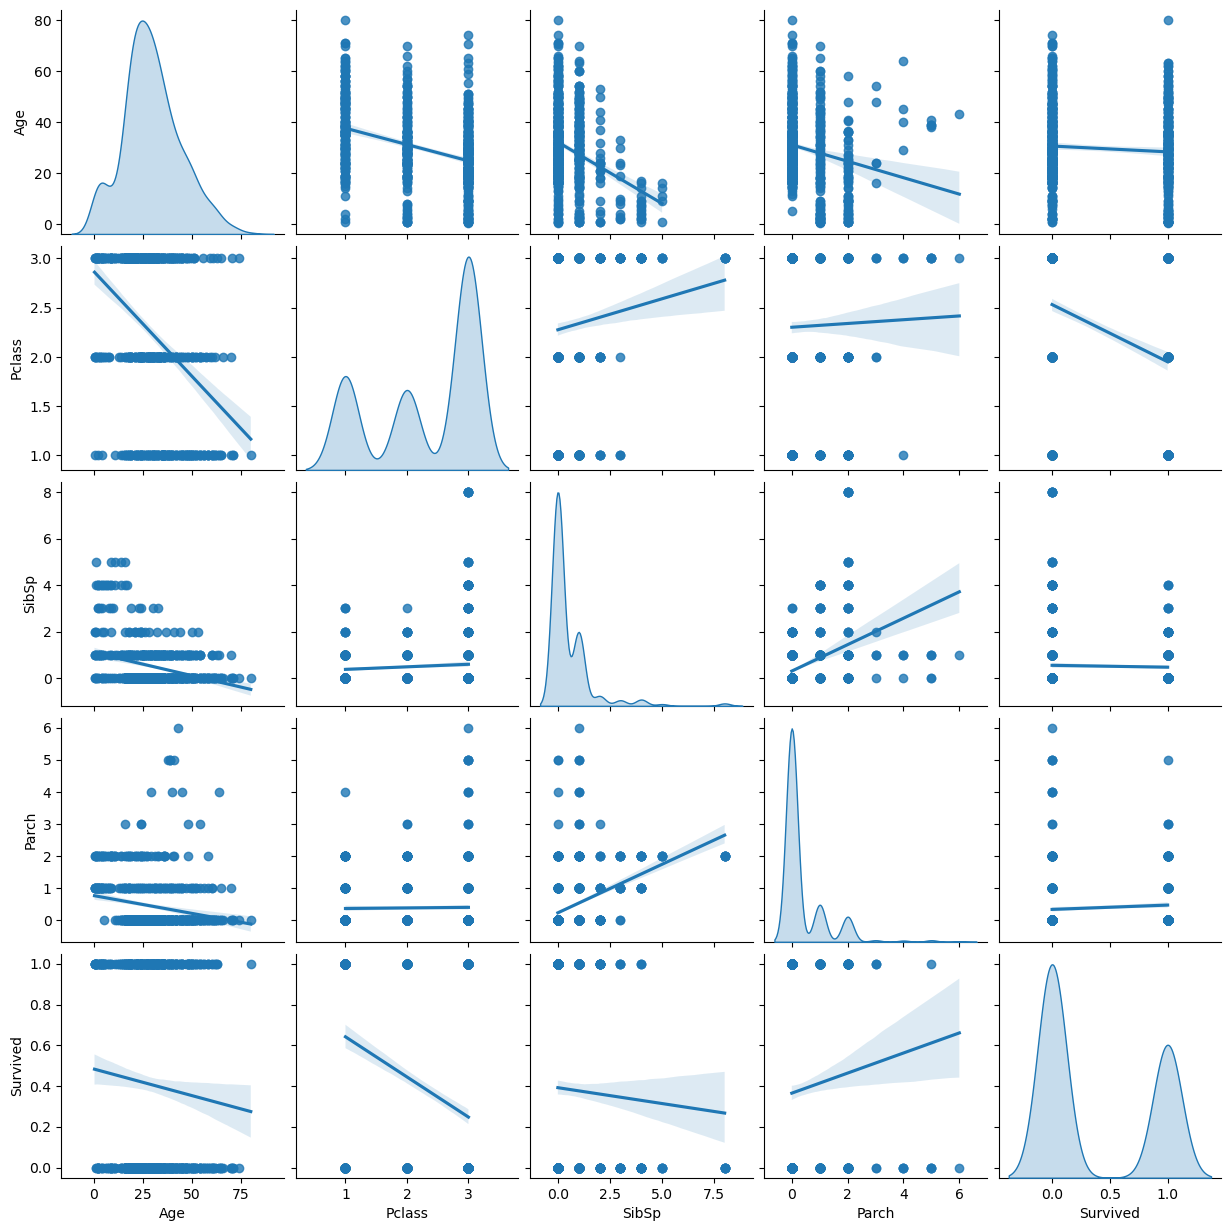

In [16]:
sns.pairplot(train_data[['Age', 'Pclass','Sex','SibSp','Parch', 'Embarked','Survived']],
             kind='reg',
             diag_kind='kde'
            )

📈
1. ❓feature and target distribution.?
2. Appearently, there are no linear realtionship between any features.
3. 

## 2. preprocessor

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
categorical_columns = ['Pclass','Sex','SibSp','Parch', 'Embarked']
numerical_columns = ['Age']
preprocessor = make_column_transformer(
    # handle_unknown='ignore' test出现 train一分类中没见过的值，标记0，
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
   (StandardScaler(), numerical_columns), 
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [21]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    preprocessor,
    RidgeClassifier(tol=1e-2, solver="auto")
)

## 3. process, metics

In [24]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked']),
                                                 ('standardscaler',
                                                  StandardScaler(), ['Age'])],
                                   verbose_feature_names_out=False)),
                ('ridgeclassifier', RidgeClassifier(tol=0.01))])

In [35]:
from sklearn.metrics import median_absolute_error
mae_train = median_absolute_error(y_train, model.predict(X_train))
print(f"Mae train set:{mae_train}")

Mae train set:0.0


🔍MAE为0 表示，有一半以上数据分类正确没有误差。
- MAE对于分类其实没有意义。因为肯定至少一半以上分类正确啊。 往往适合回归问题。

In [38]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"Accuracy on train set: {acc_train:.4f}")

Accuracy on train set: 0.8081


Text(0.5, 1.0, 'confusion matrix for RidgeClassifier on the Train set')

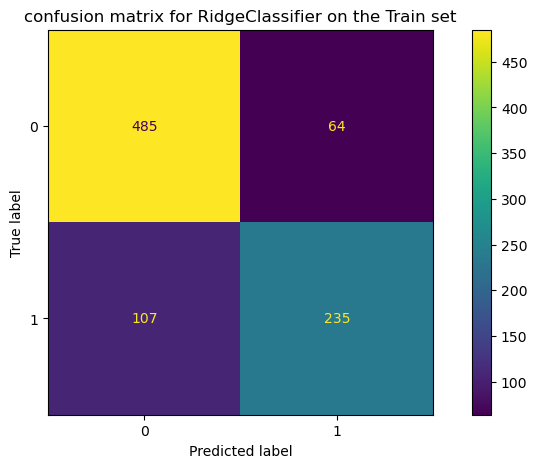

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,5))
ConfusionMatrixDisplay.from_predictions(y_train, model.predict(X_train), ax = ax)
plt.title(f"confusion matrix for {model[-1].__class__.__name__} on the Train set")

## 4. predict

In [14]:
test_data = pd.read_csv('test.csv')
X_test = test_data[feature_names]
X_test.loc[:, 'Age']= X_test['Age'].fillna(X_test['Age'].median()).astype(int)
X_test.loc[:, 'Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])

In [15]:
X_test.isnull().sum()

Age         0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [16]:
y_pred = model.predict(X_test)
y_pred.shape

(418,)

In [17]:
submission = pd.DataFrame(
    {
        'PassengerId':test_data['PassengerId'].values,
        'Survived':y_pred
    }
)
submission.to_csv('submission.csv', index=False)